In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

with open('opentom.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data)

print("✅ Dataset loaded successfully!")
# print(df.head)
print(df.columns)


✅ Dataset loaded successfully!
Index(['plot', 'personality', 'sentiment_statement', 'true_sentiment',
       'intention', 'new_location', 'observed', 'narrative', 'plot_info.mover',
       'plot_info.eoi', 'plot_info.original_place', 'plot_info.move_to_place',
       'plot_info.observer', 'preferences.mover', 'preferences.observer',
       'preferences.mover_observer', 'preferences.observer_mover',
       'question.question', 'question.answer', 'question.type'],
      dtype='object')



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   plot                        13708 non-null  object
 1   personality                 13708 non-null  object
 2   sentiment_statement         13708 non-null  object
 3   true_sentiment              13708 non-null  object
 4   intention                   13708 non-null  object
 5   new_location                13708 non-null  object
 6   observed                    13708 non-null  bool  
 7   narrative                   13708 non-null  object
 8   plot_info.mover             13708 non-null  object
 9   plot_info.eoi               13708 non-null  object
 10  plot_info.original_place    13708 non-null  object
 11  plot_info.move_to_place     13708 non-null  object
 12  plot_info.observer          13708 non-null  object
 13  preferences.mover         

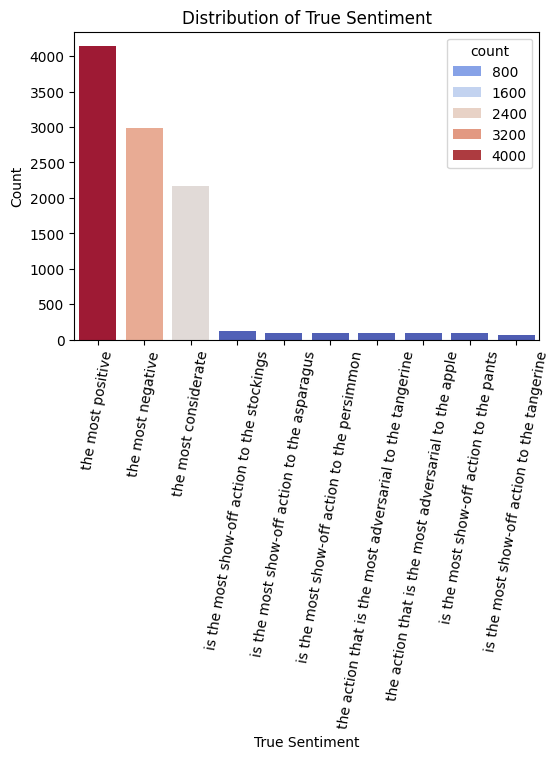

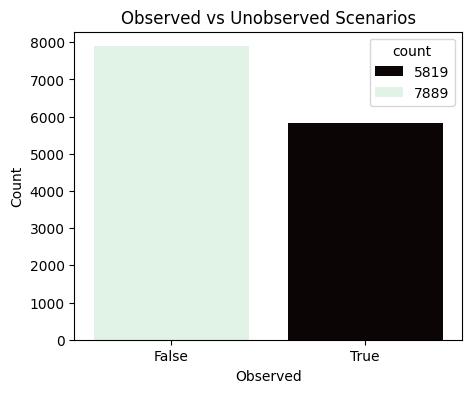

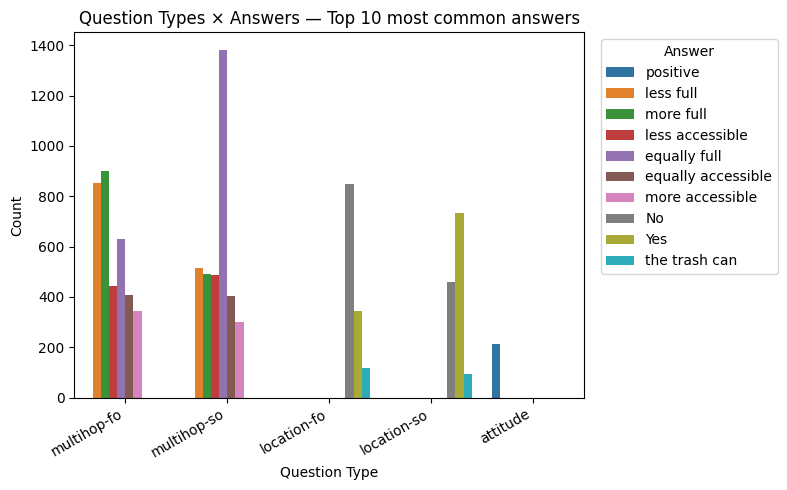

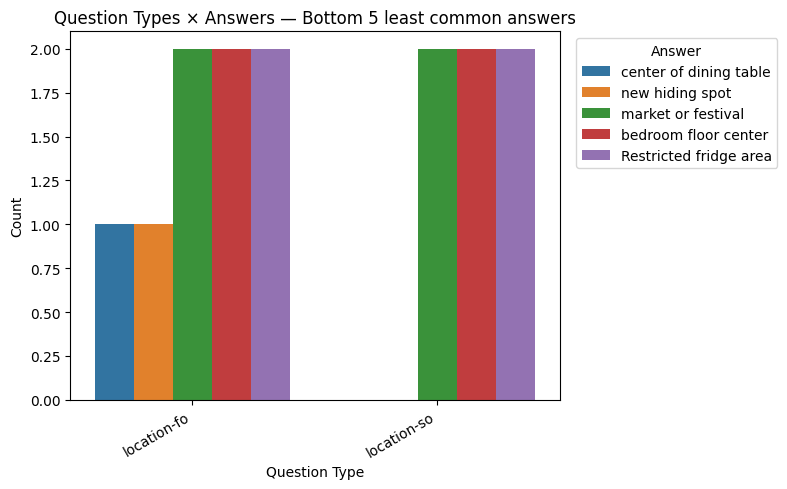

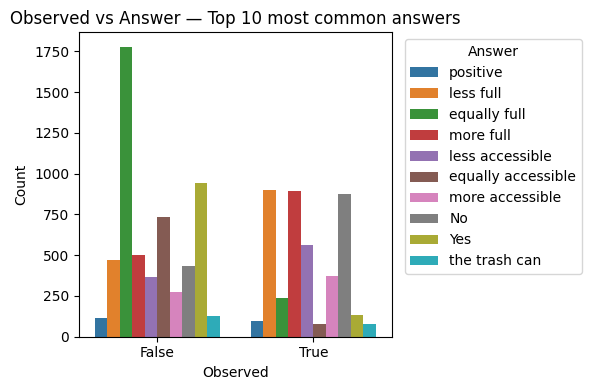

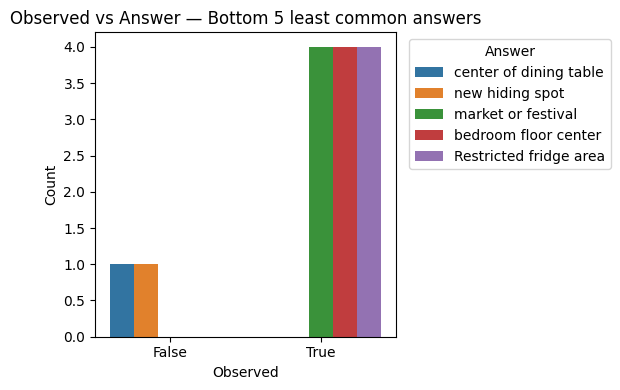

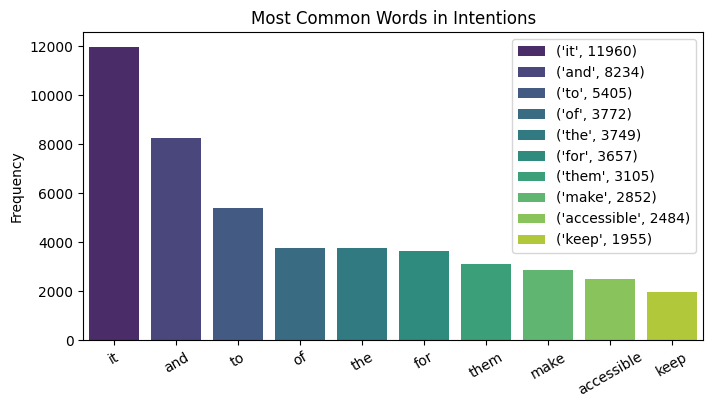


✅ Analysis complete!


In [26]:

print("\n--- Basic Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Columns ---")
print(df.columns)

# ========== SENTIMENT ANALYSIS ==========
# Count the distribution of "true_sentiment"
sentiment_counts = df['true_sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm", hue=sentiment_counts,
            order=sentiment_counts.iloc[:10].index)
plt.title("Distribution of True Sentiment")
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel("True Sentiment")
plt.ylabel("Count")
plt.show()


# ========== OBSERVED VS UNOBSERVED ==========
if 'observed' in df.columns:
    obs_counts = df['observed'].value_counts()
    plt.figure(figsize=(5, 4))
    sns.barplot(x=obs_counts.index.astype(str), y=obs_counts.values, palette="mako", hue=obs_counts,)
    plt.title("Observed vs Unobserved Scenarios")
    plt.xlabel("Observed")
    plt.ylabel("Count")
    plt.show()


# ========== ANSWER FREQUENCY FILTERS ==========
if 'question.answer' in df.columns:
    ans_counts = df['question.answer'].dropna().astype(str).value_counts()
    top_answers = ans_counts.head(10).index.tolist()
    # If there are fewer than 5 unique answers, take what's available
    bottom_answers = ans_counts.tail(min(5, len(ans_counts))).index.tolist()
else:
    top_answers, bottom_answers = [], []

# ========== QUESTION TYPE × ANSWER (TOP 10 & BOTTOM 5) ==========
if {'question.type', 'question.answer'}.issubset(df.columns):
    # --- Top 10 ---
    subset_top = df[df['question.answer'].isin(top_answers)].copy()
    if not subset_top.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=subset_top,
            x='question.type',
            hue='question.answer',
            order=subset_top['question.type'].value_counts().index
        )
        plt.title("Question Types × Answers — Top 10 most common answers")
        plt.xlabel("Question Type")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha='right')
        plt.legend(title="Answer", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    # --- Bottom 5 ---
    subset_bottom = df[df['question.answer'].isin(bottom_answers)].copy()
    if not subset_bottom.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=subset_bottom,
            x='question.type',
            hue='question.answer',
            order=subset_bottom['question.type'].value_counts().index
        )
        plt.title("Question Types × Answers — Bottom 5 least common answers")
        plt.xlabel("Question Type")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha='right')
        plt.legend(title="Answer", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

# ========== OBSERVED × ANSWER (TOP 10 & BOTTOM 5) ==========
if {'observed', 'question.answer'}.issubset(df.columns):
    # --- Top 10 ---
    subset_top = df[df['question.answer'].isin(top_answers)].copy()
    if not subset_top.empty:
        plt.figure(figsize=(6, 4))
        sns.countplot(
            data=subset_top,
            x='observed',
            hue='question.answer'
        )
        plt.title("Observed vs Answer — Top 10 most common answers")
        plt.xlabel("Observed")
        plt.ylabel("Count")
        plt.legend(title="Answer", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    # --- Bottom 5 ---
    subset_bottom = df[df['question.answer'].isin(bottom_answers)].copy()
    if not subset_bottom.empty:
        plt.figure(figsize=(6, 4))
        sns.countplot(
            data=subset_bottom,
            x='observed',
            hue='question.answer'
        )
        plt.title("Observed vs Answer — Bottom 5 least common answers")
        plt.xlabel("Observed")
        plt.ylabel("Count")
        plt.legend(title="Answer", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()



# # ========== QUESTION TYPE & ANSWER DISTRIBUTION ==========
# if 'question.type' in df.columns and 'question.answer' in df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(data=df, x='question.type', hue='question.answer', palette="Set2")
#     plt.title("Question Types and Answers")
#     plt.xlabel("Question Type")
#     plt.ylabel("Count")
#     plt.legend(title="Answer")
#     plt.show()

# ========== INTENTION ANALYSIS (WORD FREQUENCY) ==========
intention_words = " ".join(df['intention'].dropna().astype(str)).lower().split()
common_words = Counter(intention_words).most_common(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=[w for w, _ in common_words], y=[c for _, c in common_words], palette="viridis", hue=common_words)
plt.title("Most Common Words in Intentions")
plt.ylabel("Frequency")
plt.xticks(rotation=30)
plt.show()




# # ========== RELATIONSHIP BETWEEN OBSERVED & ATTITUDE ==========
# if 'observed' in df.columns and 'question.answer' in df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(data=df, x='observed', hue='question.answer', palette="Spectral")
#     plt.title("Observer Influence on Attitude")
#     plt.xlabel("Observed")
#     plt.ylabel("Count")
#     plt.legend(title="Answer")
#     plt.show()

# ========== PERSONALITY TONE ==========
if 'personality' in df.columns:
    tone_words = df['personality'].dropna().str.extract(r'(\b\w+ous\b|\b\w+ive\b|\b\w+able\b)')
    tone_words = tone_words[0].dropna().value_counts().head(10)
    if not tone_words.empty:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=tone_words.index, y=tone_words.values, palette="cubehelix", hue=tone_words)
        plt.title("Most Common Personality Descriptors")
        plt.ylabel("Count")
        plt.xticks(rotation=30)
        plt.show()

print("\n✅ Analysis complete!")
